In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from datetime import datetime

In [2]:
df = pd.read_csv('Копия Датасет база резюме.csv.csv')
df

,user_id,created_user,was_active,profession,relevant_experience_years,education,count_purchases
0,1,12/17/18 12:09,12/18/18 0:15,фотограф,0.000000,NaN,0.0
1,2,12/22/18 15:25,3/14/19 14:50,разнорабочий,0.000000,NaN,0.0
2,3,12/19/18 17:00,12/29/18 22:20,грузчик,0.833333,Средне-специальное,0.0
3,4,12/18/18 19:38,12/29/18 19:32,разнорабочий-строитель,0.000000,NaN,0.0
4,5,1/29/19 20:04,1/29/19 23:14,наборщик текста,0.000000,Средне-специальное,0.0
...,...,...,...,...,...,...,...
99714,99715,12/16/18 13:11,12/16/18 14:36,администратор,0.000000,NaN,0.0
99715,99716,2/27/19 10:06,2/27/19 10:06,уборщица,0.000000,NaN,1.0
99716,99717,12/24/18 16:53,12/24/18 16:53,механик,0.000000,NaN,0.0
99717,99718,11/13/18 21:49,1/22/19 18:37,комплектовщик/комплектовщица,8.000000,NaN,0.0


In [3]:
# преобразую столбцы с датами в формат datetime
df['created_user']= pd.to_datetime(df['created_user'])
df['was_active']= pd.to_datetime(df['was_active'])

In [4]:
#добавляю столбец delta, который показывает сколько времени юзер провел на сайте
df['delta'] = df['was_active'] - df['created_user']
df.delta.value_counts().sort_values(ascending=False).head()

0 days 00:00:00    38346
0 days 00:15:00     1997
0 days 00:16:00     1492
0 days 00:17:00      501
0 days 00:01:00      500
Name: delta, dtype: int64

#### 38346 - это кол-во пользователей, которые зарегестрировались на сайте и больше не заходили(так как нету разницы  по времени  междуу created_user и was_active )

In [5]:
# получаем столбцы с датами без времени
df['date_created_user'] = df.created_user.dt.date
df['date_was_active'] = df.was_active.dt.date
df.head()

,user_id,created_user,was_active,profession,relevant_experience_years,education,count_purchases,delta,date_created_user,date_was_active
0,1,2018-12-17 12:09:00,2018-12-18 00:15:00,фотограф,0.000000,NaN,0.0,0 days 12:06:00,2018-12-17,2018-12-18
1,2,2018-12-22 15:25:00,2019-03-14 14:50:00,разнорабочий,0.000000,NaN,0.0,81 days 23:25:00,2018-12-22,2019-03-14
2,3,2018-12-19 17:00:00,2018-12-29 22:20:00,грузчик,0.833333,Средне-специальное,0.0,10 days 05:20:00,2018-12-19,2018-12-29
3,4,2018-12-18 19:38:00,2018-12-29 19:32:00,разнорабочий-строитель,0.000000,NaN,0.0,10 days 23:54:00,2018-12-18,2018-12-29
4,5,2019-01-29 20:04:00,2019-01-29 23:14:00,наборщик текста,0.000000,Средне-специальное,0.0,0 days 03:10:00,2019-01-29,2019-01-29


In [7]:
# преобразую столбцы с датами в формат datetime
df['date_created_user']= pd.to_datetime(df['date_created_user'])
df['date_was_active']= pd.to_datetime(df['date_was_active'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99719 entries, 0 to 99718
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   user_id                    99719 non-null  int64          
 1   created_user               99719 non-null  datetime64[ns] 
 2   was_active                 99719 non-null  datetime64[ns] 
 3   profession                 99719 non-null  object         
 4   relevant_experience_years  99719 non-null  float64        
 5   education                  23582 non-null  object         
 6   count_purchases            99718 non-null  float64        
 7   delta                      99719 non-null  timedelta64[ns]
 8   date_created_user          99719 non-null  datetime64[ns] 
 9   date_was_active            99719 non-null  datetime64[ns] 
dtypes: datetime64[ns](4), float64(2), int64(1), object(2), timedelta64[ns](1)
memory usage: 7.6+ MB


In [11]:
# Динамика кол-ва покупок контактов по дням
dynamic = df.groupby('date_created_user').count()
dynamic[['count_purchases']]

,count_purchases
date_created_user,
2018-11-01,935
2018-11-02,736
2018-11-03,653
2018-11-04,504
2018-11-05,518
...,...
2019-02-24,968
2019-02-25,1041
2019-02-26,1025


In [9]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15,6

<AxesSubplot:title={'center':'Динамика кол-ва покупок контактов по дням'}, xlabel='Год', ylabel='Количество покупок рекрутерами'>

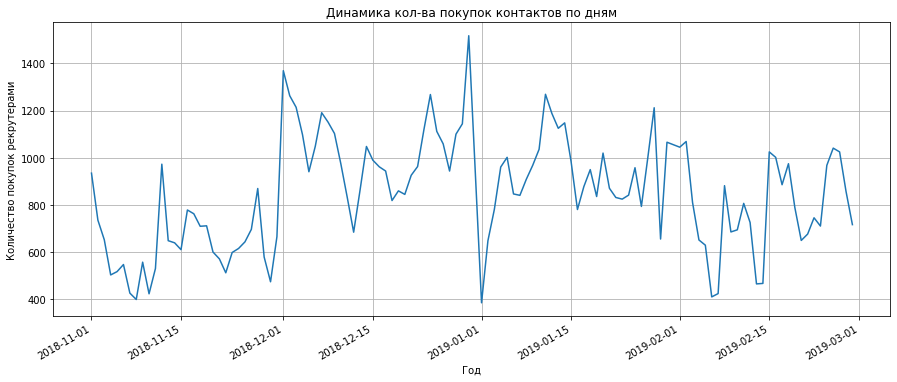

In [12]:
dynamic['count_purchases'].plot(title='Динамика кол-ва покупок контактов по дням', 
                    xlabel='Год', 
                    ylabel='Количество покупок рекрутерами',
                    grid= True)

<AxesSubplot:title={'center':'Динамика кол-ва покупок контактов'}, xlabel='relevant_experience_years', ylabel='count_purchases'>

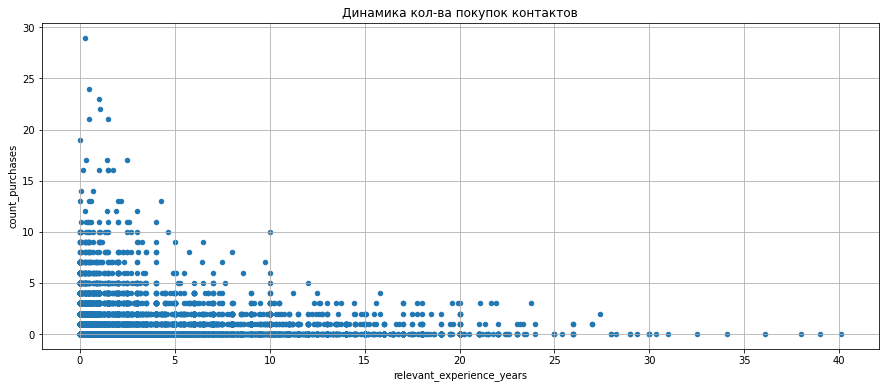

In [13]:
df.plot(kind='scatter', 
        x='relevant_experience_years', 
        y='count_purchases',
        title='Динамика кол-ва покупок контактов',
        grid=True)

#### Чем меньше релевантный опыт работы тем больше откликов получал соискатель и наоборот.


In [14]:
#оставляю необходимые столбцы
data = df[['user_id','date_created_user','date_was_active','count_purchases','delta']]
data

,user_id,date_created_user,date_was_active,count_purchases,delta
0,1,2018-12-17,2018-12-18,0.0,0 days 12:06:00
1,2,2018-12-22,2019-03-14,0.0,81 days 23:25:00
2,3,2018-12-19,2018-12-29,0.0,10 days 05:20:00
3,4,2018-12-18,2018-12-29,0.0,10 days 23:54:00
4,5,2019-01-29,2019-01-29,0.0,0 days 03:10:00
...,...,...,...,...,...
99714,99715,2018-12-16,2018-12-16,0.0,0 days 01:25:00
99715,99716,2019-02-27,2019-02-27,1.0,0 days 00:00:00
99716,99717,2018-12-24,2018-12-24,0.0,0 days 00:00:00
99717,99718,2018-11-13,2019-01-22,0.0,69 days 20:48:00


In [15]:
#оставляю только тех пользователей, которые зарегестрировались в ноябре и на которых откликнулись рекрутеры
november = data[(data.date_created_user >= '2018-11-01')
               & (data.date_created_user <= '2018-11-30')
               & (data.count_purchases > 0)
               ]
november

,user_id,date_created_user,date_was_active,count_purchases,delta
20,21,2018-11-08,2019-01-20,1.0,72 days 16:41:00
64,65,2018-11-17,2019-03-01,2.0,104 days 09:03:00
141,142,2018-11-11,2019-03-17,1.0,125 days 17:26:00
159,160,2018-11-21,2019-03-02,2.0,100 days 18:06:00
198,199,2018-11-12,2019-01-04,1.0,52 days 10:10:00
...,...,...,...,...,...
99531,99532,2018-11-03,2019-02-22,2.0,111 days 08:06:00
99535,99536,2018-11-07,2019-03-03,1.0,116 days 00:12:00
99592,99593,2018-11-04,2019-01-12,1.0,69 days 05:07:00
99624,99625,2018-11-02,2019-02-24,1.0,114 days 21:03:00


In [17]:
#оставляю только тех пользователей, которые зарегестрировались в ноябре
november2 = data[(data.date_created_user >= '2018-11-01')
               & (data.date_created_user <= '2018-11-30')
               ]
november2

,user_id,date_created_user,date_was_active,count_purchases,delta
7,8,2018-11-01,2018-12-21,0.0,49 days 08:18:00
14,15,2018-11-13,2018-12-22,0.0,38 days 21:55:00
15,16,2018-11-30,2019-01-04,0.0,35 days 04:16:00
20,21,2018-11-08,2019-01-20,1.0,72 days 16:41:00
31,32,2018-11-23,2019-01-13,0.0,50 days 21:15:00
...,...,...,...,...,...
99674,99675,2018-11-19,2019-01-25,0.0,66 days 13:45:00
99688,99689,2018-11-19,2018-12-06,0.0,17 days 00:19:00
99696,99697,2018-11-09,2019-01-11,0.0,62 days 23:18:00
99703,99704,2018-11-30,2018-12-01,0.0,1 days 00:05:00


In [18]:
reg = november.groupby('date_created_user').count()
reg2 = november2.groupby('date_created_user').count()

<AxesSubplot:title={'center':'Ноябрь'}, xlabel='день', ylabel='Количество покупок рекрутерами'>

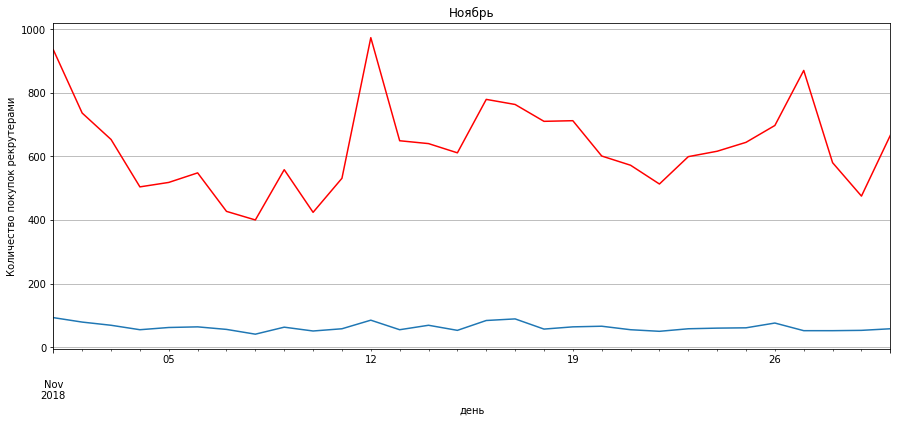

In [36]:
reg['count_purchases'].plot(title='Ноябрь',
                    xlabel='день', 
                    ylabel='Количество покупок рекрутерами',
                    grid= True)
reg2['count_purchases'].plot(color = 'red', 
                    xlabel='день', 
                    ylabel='Количество покупок рекрутерами',
                    grid= True ) 

#### На синем графике представлено кол-во соискателей,на которых откликнулись рекрутеры , а на красном графике представлено количество зарегестрировавшихся соискателей за месяц

In [10]:
# замена значения NAN на "Информация отсутствует"
df['education'].replace(np.nan,'Информация отсутствует',inplace=True)
df

,user_id,created_user,was_active,profession,relevant_experience_years,education,count_purchases,delta,date
0,1,2018-12-17 12:09:00,2018-12-18 00:15:00,фотограф,0.000000,Информация отсутствует,0.0,0 days 12:06:00,2018-12-17
1,2,2018-12-22 15:25:00,2019-03-14 14:50:00,разнорабочий,0.000000,Информация отсутствует,0.0,81 days 23:25:00,2018-12-22
2,3,2018-12-19 17:00:00,2018-12-29 22:20:00,грузчик,0.833333,Средне-специальное,0.0,10 days 05:20:00,2018-12-19
3,4,2018-12-18 19:38:00,2018-12-29 19:32:00,разнорабочий-строитель,0.000000,Информация отсутствует,0.0,10 days 23:54:00,2018-12-18
4,5,2019-01-29 20:04:00,2019-01-29 23:14:00,наборщик текста,0.000000,Средне-специальное,0.0,0 days 03:10:00,2019-01-29
...,...,...,...,...,...,...,...,...,...
99714,99715,2018-12-16 13:11:00,2018-12-16 14:36:00,администратор,0.000000,Информация отсутствует,0.0,0 days 01:25:00,2018-12-16
99715,99716,2019-02-27 10:06:00,2019-02-27 10:06:00,уборщица,0.000000,Информация отсутствует,1.0,0 days 00:00:00,2019-02-27
99716,99717,2018-12-24 16:53:00,2018-12-24 16:53:00,механик,0.000000,Информация отсутствует,0.0,0 days 00:00:00,2018-12-24
99717,99718,2018-11-13 21:49:00,2019-01-22 18:37:00,комплектовщик/комплектовщица,8.000000,Информация отсутствует,0.0,69 days 20:48:00,2018-11-13


In [49]:
df.groupby('education').agg({'relevant_experience_years': ['mean'], 'count_purchases': 'count'})

,relevant_experience_years,count_purchases
,mean,count
education,,
Высшее,3.981161,3875
Информация отсутствует,0.528382,76137
Средне-специальное,1.934186,19706


#### Среднее значение релевантного стажа работы в зависимости от образования и какое кол-во откликов у соискателей с разным уровнем образования

<AxesSubplot:title={'center':'Доля соискателей с разным образованием'}>

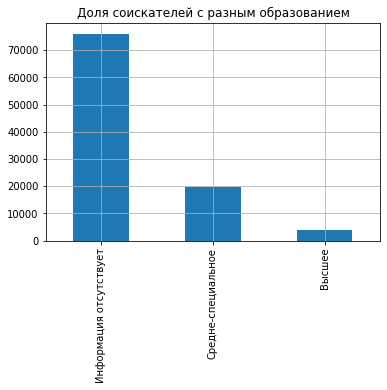

In [52]:
education = df.education.value_counts()
education.plot(kind = 'bar',
              title = 'Доля соискателей с разным образованием',
              grid = True)

In [43]:
df.profession.value_counts().head(15) # 15 наиболее популярных профессий получивших наибольшее кол-во откликов

администратор                 15569
водитель                      11187
разнорабочий                   6872
официант                       5980
уборщица                       4767
менеджер по продажам           3929
грузчик                        3598
тестировщик мобильных игр      3535
продавец-консультант           3260
курьер                         2729
охранник                       2209
наборщик текста                1856
повар                          1668
продавец-кассир                1611
офис-менеджер                  1503
Name: profession, dtype: int64

<AxesSubplot:title={'center':'Доля соискателей по профессиям'}, ylabel='profession'>

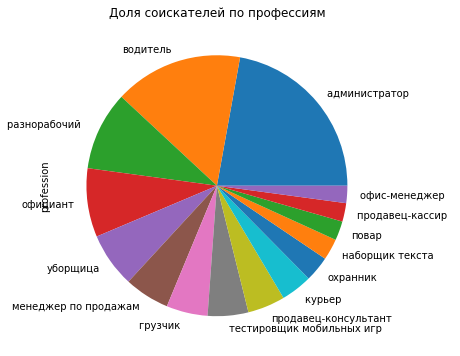

In [100]:
# Доля соискателей по профессиям
profession = df.profession.value_counts().sort_values(ascending=False).head(15)
profession.plot(kind = 'pie',
               title = 'Доля соискателей по профессиям',
               )

In [6]:
df.profession.value_counts().tail(15) # 15 профессий, которые не получили отклики

инженер апс                                           1
травматолог                                           1
заведующий                                            1
специалист по финансам и управленческому учету        1
главный специалист по лизингу                         1
оптометрист                                           1
начальник кадастрового отдела                         1
мастер по сход-развалу                                1
оператор валочно-пакетирующей машины                  1
заведующий магазином                                  1
слесарь по ремонту подвижного состава локомотива      1
мастер производственного обучения                     1
мастер по укладке напольных покрытий                  1
расстановщик                                          1
оператор-программист фрезерного станка с ЧПУ          1
Name: profession, dtype: int64

In [104]:
df[['relevant_experience_years','count_purchases']].corr()

,relevant_experience_years,count_purchases
relevant_experience_years,1.000000,0.040381
count_purchases,0.040381,1.000000


#### Чем ниже опыт работы, тем больше откликов получал соискатель.

### 

In [58]:
#Рассматриваю долю рекрутеров, которые хотя юы раз откликнулись на данные соискателя
recrut = df[(df.count_purchases > 0)# соискатели на которых откликнулись рекрутеры
           &(df.delta > '0 days 00:00:00') # исключаю тех соискателей, у которых delta =0(т.е. никакой активности после регистрации)
           &(df.relevant_experience_years < 25) # исходя из графика "Динамика кол-ва покупок контактов" принимаю значение выше 25, как выбросы
           &(df.count_purchases < 18) #исходя из графика "Динамика кол-ва покупок контактов" принимаю значение выше 18, как выбросы
           ] 
recrut

,user_id,created_user,was_active,profession,relevant_experience_years,education,count_purchases,delta,date
6,7,2019-02-04 13:03:00,2019-02-04 13:18:00,кассир,3.000000,Средне-специальное,2.0,0 days 00:15:00,2019-02-04
11,12,2019-02-04 16:52:00,2019-02-04 17:44:00,помощник юриста,0.000000,Средне-специальное,1.0,0 days 00:52:00,2019-02-04
12,13,2019-01-27 12:30:00,2019-01-29 12:52:00,разнорабочий,0.000000,Средне-специальное,1.0,2 days 00:22:00,2019-01-27
20,21,2018-11-08 20:42:00,2019-01-20 13:23:00,бухгалтер,2.500000,Средне-специальное,1.0,72 days 16:41:00,2018-11-08
22,23,2018-12-28 00:29:00,2019-01-02 00:52:00,сварщик,0.000000,Информация отсутствует,1.0,5 days 00:23:00,2018-12-28
...,...,...,...,...,...,...,...,...,...
99662,99663,2019-02-08 19:12:00,2019-02-13 18:54:00,администратор,0.000000,Информация отсутствует,1.0,4 days 23:42:00,2019-02-08
99666,99667,2019-02-05 02:58:00,2019-03-06 15:48:00,экономист,0.000000,Средне-специальное,3.0,29 days 12:50:00,2019-02-05
99680,99681,2019-02-20 18:30:00,2019-02-20 18:46:00,менеджер по продажам,0.333333,Средне-специальное,10.0,0 days 00:16:00,2019-02-20
99685,99686,2019-02-10 16:46:00,2019-03-22 18:46:00,продавец-кассир,0.000000,Средне-специальное,5.0,40 days 02:00:00,2019-02-10


In [102]:
# среднее время жизни на сайте, исключая тех пользователей, которые после регистрации ни разу не заходили на сайт
recrut.delta.mean() 

Timedelta('33 days 18:08:13.019736842')

<AxesSubplot:title={'center':'Доля соискателей по профессиям'}, ylabel='profession'>

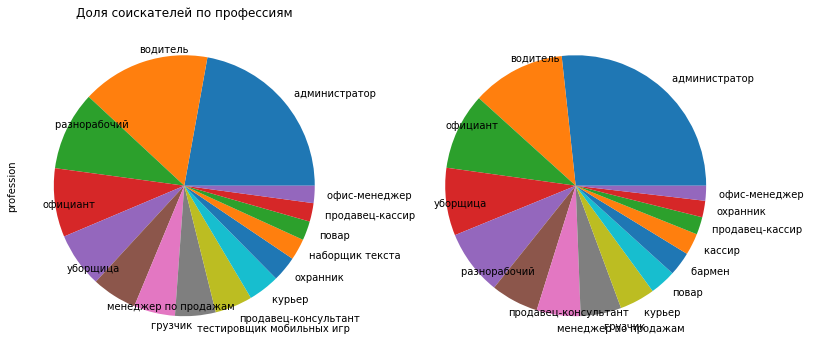

In [101]:
profession2 = recrut.profession.value_counts().sort_values(ascending=False).head(15)
profession2.plot(kind = 'pie',
              title = 'Доля соискателей по профессиям',
                center=(5,2),
               
        )#правыая диаграмма
profession = df.profession.value_counts().sort_values(ascending=False).head(15)
profession.plot(kind = 'pie',
               title = 'Доля соискателей по профессиям',
               center=(2,2),
               )

#### сравнивая показатели между изначальным датасетом(левая диаграмма) и отфильтрованным(правая диаграмма) выходит,что тестировщики моб.приложений и наборщики текста не актуальные специальности для рекрутеров. Можно заметить, что они ищут специальность бармена, которая не входит в топ размещаемых специальностей соискателями. 